<p style="text-align:center;font-weight: bold;">  </p>
<p style="text-align:center;font-size:35px;font-weight: bold;">HOW TO CREATE A CUSTOM WORD CLOUD IN PYTHON</p>
<p style="text-align:center;font-weight: bold;">  </p>
<p style="text-align:center;font-size:20px"> By using WordCloud library</p>
<p>  </p>


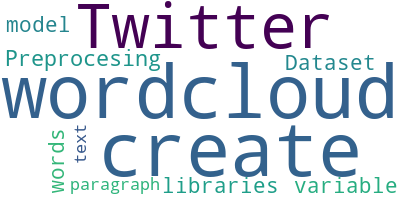

<p style="text-align:justify"> A WordCloud  or TagCloud is a graphical representation of word frequency within a text: the more often a word is used in a text, the bigger and bolder it is represented in a graph. It can be a useful tool to communicate at a glance the most important keywords in a particular text or topic in a effective and fun way. </p>

<p style="text-align:justify"> In this tutorial we will create a WordCloud from a sample of nameless tweets extracted from Twitter for the period 3/16/2020 - 08/31/2020 in Peru. The dataset was modificated to respect Twitter private information policy and is used just as an example to show how to create a WordCloud. With this dataset, we will do different examples of WordClouds by using the following steps: </p>

<ol>
  <li>Install packages and import libraries </li>
  <li>Import the dataset, clean it up and select the text you are going to work with (tweets)</li>
  <li>Perform the text preprocessing and create a text variable </li>
  <li>Create your WordCloud:
    <p>  </p>  
      <ul> 
          <li>Default model</li>
          <li>Default model </li>
      </ul>
  </li>
  <p>  </p>  
    
   <li>Bibliography </li>   
</ol>



## 1. Installation

In [ ]:
#If you are using pip:
pip install wordcloud
# If you are using conda, you can install from the conda-forge channel:
conda install -c conda-forge wordcloud
#Notes: wordcloud depends on numpy and pillow.To save the wordcloud into a file, matplotlib can also be installed 

### 2. Importar librerías

In [5]:
# libraries for wordcloud

import numpy as np # handling multi-dimensional arrays and matrices.
import pandas as pd #numpy can be used with pandas to perform data analysis.
from PIL import Image #Pillow library is a package that enables image reading. Pillow is a wrapper for PIL - Python Imaging Library. You will need this library to read in image as the mask for the wordcloud.

import matplotlib.pyplot as plt # basic library for visualization. It enables many other libraries to run and plot on its base including seaborn or wordcloud that you will use in this tutorial.

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #wordclouds

# other libraries

import re # A regular expression (or RE) specifies a set of strings that matches it; the functions in this module let you check if a particular string matches a given regular expression (or if a given regular expression matches a particular string, which comes down to the same thing).
import emoji as emoji # Emoji Module is a Python package that allows us to use and print emojis through a Python program, and we can even use this module to use emojis inside an application we are creating using Python.

import warnings #
warnings.filterwarnings("ignore") #

from nltk.corpus import stopwords

##from os import path


### 3. Importar base de datos

In [6]:
df = pd.read_csv(r'C:\Users\jilli\Desktop\ANACONDA\WORDCLOUDS\sampleTweetsPeru.csv')
df.shape #53 102 tweets y 11 variables

(53102, 11)

In [7]:
df.head(5) # mostrar las 5 primeras filas

Tweet_Id  Tweet_User_Id  Tweet_User  \
0         1              1           1   
1         2              2           2   
2         3              3           3   
3         4              4           4   
4         5              5           5   

                                                Text  Retweets  Favorites  \
0  Si no fuera por la cuarentena, hace ratooooo e...         0          0   
1  Mejor asi acabamos con la Pandemia Fujimorista...         0          4   
2  Yo, cuando coma chifa después de la cuarentena...         3          3   
3  Ala mierda está lluvia está limpiando el coron...         0          1   
4  Hay personas que fueron independientes toda su...         0          0   

   Replies                   Datetime Pais         Tweet_Source lang  
0        0  2020-03-31 23:54:07+00:00  Per  Twitter for Android   es  
1        1  2020-03-31 23:53:42+00:00  Per   Twitter for iPhone   es  
2        0  2020-03-31 23:50:29+00:00  Per   Twitter for iPhone   es  
3        1  2020-03-31 23:49:21+00:00  Per   Twitter for iPhone   es  
4        0  2020-03-31 23:46:17+00:00  Per  Twitter for Android   es

### 4. Revision de base de datos

In [8]:
df.info() #revisión descriptiva de variasbles de base de datos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53102 entries, 0 to 53101
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_Id       53102 non-null  int64 
 1   Tweet_User_Id  53102 non-null  int64 
 2   Tweet_User     53102 non-null  int64 
 3   Text           53102 non-null  object
 4   Retweets       53102 non-null  int64 
 5   Favorites      53102 non-null  int64 
 6   Replies        53102 non-null  int64 
 7   Datetime       53102 non-null  object
 8   Pais           53102 non-null  object
 9   Tweet_Source   53102 non-null  object
 10  lang           53102 non-null  object
dtypes: int64(6), object(5)
memory usage: 4.5+ MB


In [9]:
df.isnull().sum() # revisión de nulos
df.isna().sum()  # en caso se quiera borrar df.dropna(inplace=True)

Tweet_Id         0
Tweet_User_Id    0
Tweet_User       0
Text             0
Retweets         0
Favorites        0
Replies          0
Datetime         0
Pais             0
Tweet_Source     0
lang             0
dtype: int64

In [10]:
df.duplicated() #ver si hay duplicados por fila
df.Text.duplicated().sum()

0

In [11]:
duplicateRowsDF = df[df.Text.duplicated()] #mostar lista de duplicados
duplicateRowsDF 

Empty DataFrame
Columns: [Tweet_Id, Tweet_User_Id, Tweet_User, Text, Retweets, Favorites, Replies, Datetime, Pais, Tweet_Source, lang]
Index: []

In [12]:
df['lang'].value_counts() # todos los tweets están en español

es    53102
Name: lang, dtype: int64

In [13]:
Tweet_Source = df.groupby("Tweet_Source") # en caso se quieran ver estadísticas agrupadas por una variable
Tweet_Source.describe().head()

Tweet_Id                                                \
                  count          mean           std      min      25%   
Tweet_Source                                                            
Foursquare         19.0  12955.684211  11725.116171   2724.0   6657.0   
Hootsuite Inc.     26.0  35608.846154  11673.582051  16725.0  26792.5   
Instagram        3865.0  28001.978008  16408.869315     12.0  11811.0   
SocialGest          1.0  30060.000000           NaN  30060.0  30060.0   
Squarespace         1.0  42379.000000           NaN  42379.0  42379.0   

                                           Tweet_User_Id                ...  \
                    50%       75%      max         count          mean  ...   
Tweet_Source                                                            ...   
Foursquare      10107.0  13084.00  52599.0          19.0  12955.684211  ...   
Hootsuite Inc.  32214.5  47028.75  52898.0          26.0  35608.846154  ...   
Instagram       29838.0  42478.00  53081.0        3865.0  28001.978008  ...   
SocialGest      30060.0  30060.00  30060.0           1.0  30060.000000  ...   
Squarespace     42379.0  42379.00  42379.0           1.0  42379.000000  ...   

               Favorites       Replies                                     \
                     75%   max   count      mean       std  min  25%  50%   
Tweet_Source                                                                
Foursquare           0.0   2.0    19.0  0.052632  0.229416  0.0  0.0  0.0   
Hootsuite Inc.       0.0   1.0    26.0  0.000000  0.000000  0.0  0.0  0.0   
Instagram            0.0  98.0  3865.0  0.045019  0.313667  0.0  0.0  0.0   
SocialGest           0.0   0.0     1.0  0.000000       NaN  0.0  0.0  0.0   
Squarespace          3.0   3.0     1.0  0.000000       NaN  0.0  0.0  0.0   

                          
                75%  max  
Tweet_Source              
Foursquare      0.0  1.0  
Hootsuite Inc.  0.0  0.0  
Instagram       0.0  8.0  
SocialGest      0.0  0.0  
Squarespace     0.0  0.0  

[5 rows x 48 columns]

### 5. Selección de variable sobre la cual se hará wordcloud

In [14]:
?WordCloud # You can see that the only required argument for a WordCloud object is the text, while all others are optional.

Object `WordCloud # You can see that the only required argument for a WordCloud object is the text, while all others are optional.` not found.


In [15]:
df.Text[0:5] # mostrar 5 primeras filas de variable sobre la cual se hará el wordcloud

0    Si no fuera por la cuarentena, hace ratooooo e...
1    Mejor asi acabamos con la Pandemia Fujimorista...
2    Yo, cuando coma chifa después de la cuarentena...
3    Ala mierda está lluvia está limpiando el coron...
4    Hay personas que fueron independientes toda su...
Name: Text, dtype: object

In [16]:
pd.set_option("display.max_colwidth",None) #leer texto completo

In [17]:
df.Text[0:5] # mostrar filas

0                                                                                                                                                                          Si no fuera por la cuarentena, hace ratooooo estuviera caminando bajo la lluvia 💕
1                                                                                                                                                                                          Mejor asi acabamos con la Pandemia Fujimorista >) :)👑👑👑🇵🇪🇵🇪🇵🇪 . 🍔
2                                                                                                                                                                              Yo, cuando coma chifa después de la cuarentena #cuarentena #coronavirusenperu
3                                                                                                                                                                                                   Ala mierda está lluvia está limpiando el coro

### 6. pre-procesamiento de datos Text Preprocessing de variable Text

el preprocesamiento de los datos consiste fundamentalmente en una serie de transformaciones que se realizan sobre los datos de entrada, en nuestro caso varios posts en formato TXT, con el objetivo de obtener datos uniformes y sin elementos que puedan afectar a la calidad de los resultados, 

https://datos.gob.es/en/documentacion/como-crear-nubes-de-palabras-partir-de-un-texto-utilizando-tecnicas-de-pln
    https://www.datacamp.com/community/tutorials/wordcloud-python

#### Limpieza de textos

In [18]:
# Agregar columna "clean_text" en donde se realizará la limpieza de los tweets
df["Text_clean"]=df["Text"]
#.to_numpy()

In [19]:
#Funciones de limpieza
# Para ello generamos una función en la cual indicamos todos los cambios que queremos aplicar al texto.

def clean(text):
     
  #cambiar jergas

    jerga = [('d','de'), ('[qk]','que'), ('xo','pero'),('fav','favorito'), ('vac','vacaciones'),('xa', 'para'), ('ala', 'asombro'),('[xp]q','porque'),('es[qk]', 'es que'),
             ('fvr','favor'),('(xfa|xf|pf|plis|pls|porfa)', 'por favor'), ('dnd','donde'), ('tb', 'también'),('ud','usted'),
             ('uds','ustedes'),('sr','señor'),('(fds|finde)','fin de semana'),('app','aplicación'),
             ('(ctm|alv|hdp|csm|La concha de tu madre|conchasumadres|reconchadesumadre|conchatumadre|la concha de la madre|la concha de su madre|La concha bien de su madre|la concha de tu hermana|concha madre|mierda|carajo|crjo)','insulto'),
             ('(tq|tk)', 'te quiero'), ('(tqm|tkm)', 'te quiero mucho'),('bb','bebé'), ('x','por'), ('\+','mas')]

    for s,t in jerga:
        text = re.sub(r'\b{0}\b'.format(s), t, text, flags=re.IGNORECASE)

  # limpieza 

    text = text.lower()
    text = re.sub(r'https?://\S+','',text) #normURLs  look for https and replace for ""
    text = re.sub(r'www.\S+','',text) #normWWW
    text = re.sub(emoji.get_emoji_regexp(), r"", text)  #remove emoji
    text = re.sub(r'@\S+','',text) #remove user 
                                   #  \S cualquier car´acter salvo un espacio en blanco
                                   # + car´acter previo 1 o m´as veces
                                   # inicia con @
    #text = re.sub(r'#\S+','',text) #norm_hashtags    
    text = re.sub(r'– at.+$','',text) #remove_at
    text = re.sub(r'\b(?=\w*[j])[aeiouj]{4,}|(juas+|lol+)|(ja|jaa)\b', 'risas', text, flags=re.IGNORECASE) #normalize_risas replace jajaja jiji for risas
                                          # \b cadena vac´ıa
                                          # \w caracter alfanum´erico o gui´on bajo
    text = re.sub(r'[^\w\s]','',text) #del profesor  extraer lo q NO es espacio y caract. alfa o _
                                      ### por ejemmplo quita  ( ?
                                      #\s espacio en blanco  
                                      #\w ar´acter alfanum´erico o gui´on bajo
                                      # ^  ˆal inicio de un [] significa negaci´on
    text = re.sub(r'(.)\1{2,}', r'\1\1', text, flags=re.IGNORECASE) #normalize_repet nooo  a noo   
    #text = re.sub('\d+', '', text) #remove_digits
                                   # \d  digito # + car´acter previo 1 o m´as veces
    text = text.replace("ー","")     #quita _
    #text = re.sub("ー-", "", text)
    text = re.sub(r'\b\w{1,2}\b','',text) #remover palabras (caracter alfanumericos o_) de 1 a 2 letras
                                        # \b cadena vac´ıa
                                        # \w caracter alfanum´erico o gui´on bajo
                                        # {1,2}  {m,n} busca la coincidencia de la expresi´on anterior de m a n veces, tomando tantas repeticiones como sea posible.
    text = re.sub(r' +',' ',text) #remove_spaces  #remueve espacios extra  y lo cambia por solo 1 espacio
    text = text.strip()   #removes whitespaces from the start and end of the string

  # reemplazar tíldes
    
    vocales= [('á','a'), ('é','e'), ('í','i'), ('ó','o'), ('ú','u'), ('ü','u'),('aa','a'), ('ee','e'), ('ii','i'), ('oo','o'), ('uu','u')]
    
    for s,t in vocales:
        text = re.sub(r'{0}'.format(s), t, text, flags=re.IGNORECASE)
        
        
    return text  


In [20]:
df['clean_text']=df['Text'].apply(lambda tweet: clean(tweet)) # limpieza

In [21]:
df[["Text","clean_text"]].head()

Text  \
0                                                                                                                                                                        Si no fuera por la cuarentena, hace ratooooo estuviera caminando bajo la lluvia 💕   
1                                                                                                                                                                                        Mejor asi acabamos con la Pandemia Fujimorista >) :)👑👑👑🇵🇪🇵🇪🇵🇪 . 🍔   
2                                                                                                                                                                            Yo, cuando coma chifa después de la cuarentena #cuarentena #coronavirusenperu   
3                                                                                                                                                                                                 Ala mierda está lluvia está limpiando el coronavirus (?)   
4  Hay personas que fueron independientes toda su vida, no estan en ningun programa de bono o auxilio, ahora en cuarentena. Sin dinero, sin asistencia, mayores de 60 años sin poder producir, se mueren de hambre Se hará algún programa que los ayuden?    

                                                                                                                                                                                                        clean_text  
0                                                                                                                                                   fuera por cuarentena hace rato estuviera caminando bajo lluvia  
1                                                                                                                                                                      mejor asi acabamos con pandemia fujimorista  
2                                                                                                                                                cuando coma chifa despues cuarentena cuarentena coronavirusenperu  
3                                                                                                                                                           asombro insulto esta lluvia esta limpiando coronavirus  
4  hay personas que fueron independientes toda vida estan ningun programa bono auxilio ahora cuarentena sin dinero sin asistencia mayores años sin poder producir mueren hambre hara algun programa que los ayuden

In [22]:
# tokenización
# Una vez que hemos eliminado el ruido en los textos con los cuales vamos a trabajar, “tokenizaremos” en palabras cada uno de los textos. Para ello utilizaremos la funció split(), usando como separador entre palabras, el espacio. Esto permitirá separar las palabras de manera independiente (tokens) para análisis futuros.
# Al mismo tiempo se extraen los stopwords

spanish_stopwords = stopwords.words('spanish')   ##para quitar las stopwords
spanish_stopwords.extend(['así','tambien','ahi','decir','asi','ir','voy','fui','ire','ud','mierda','ademas','etc','además','pueden','dos','mese','cosa','gran','tan','puede','vez','creo','deben','dia','viru','vo','acá','dice','xq','mese','what','aún','día','hizo','debe','sigue','mismo','pasa','vo','fa','luego','alguien','cada','sino','','User','ma','aquí','mientras','vamo','ahí','sabe','sido','tener','meno','mientra','pue','pues','da','hacen','van','después','tbt','URL','va','mts','x','día','ser','ver','hace','hoy''ahora','hara','algun','solo','toda','at','q','juncal','mas','nunca','cómo','si','sí','hacer','hoy','sólo','estan','solamente','dias','dia','aqui','aca','alla','alli'])
df['clean_text'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords)]))

In [23]:
df[["Text","clean_text"]].head()

Text  \
0                                                                                                                                                                        Si no fuera por la cuarentena, hace ratooooo estuviera caminando bajo la lluvia 💕   
1                                                                                                                                                                                        Mejor asi acabamos con la Pandemia Fujimorista >) :)👑👑👑🇵🇪🇵🇪🇵🇪 . 🍔   
2                                                                                                                                                                            Yo, cuando coma chifa después de la cuarentena #cuarentena #coronavirusenperu   
3                                                                                                                                                                                                 Ala mierda está lluvia está limpiando el coronavirus (?)   
4  Hay personas que fueron independientes toda su vida, no estan en ningun programa de bono o auxilio, ahora en cuarentena. Sin dinero, sin asistencia, mayores de 60 años sin poder producir, se mueren de hambre Se hará algún programa que los ayuden?    

                                                                                                                                               clean_text  
0                                                                                                                   cuarentena rato caminando bajo lluvia  
1                                                                                                                     mejor acabamos pandemia fujimorista  
2                                                                                              coma chifa despues cuarentena cuarentena coronavirusenperu  
3                                                                                                            asombro insulto lluvia limpiando coronavirus  
4  personas independientes vida ningun programa bono auxilio ahora cuarentena dinero asistencia mayores años poder producir mueren hambre programa ayuden

### 7. Wordcloud

In [24]:
# palabras que serán utilizadas
words = " ".join(review for review in df.clean_text)
print ("There are {} words in the combination of all review.".format(len(words)))

There are 5429352 words in the combination of all review.


In [25]:
words

'cuarentena rato caminando bajo lluvia mejor acabamos pandemia fujimorista coma chifa despues cuarentena cuarentena coronavirusenperu asombro insulto lluvia limpiando coronavirus personas independientes vida ningun programa bono auxilio ahora cuarentena dinero asistencia mayores años poder producir mueren hambre programa ayuden llueve chico acuerda lluvia acida chernobyl cuarentena yomequedoencasa coronavirus ahora apoyo clima lloviendo sjm lima peru faltan cosas compensan respecto supuesto documento interno circula redes sociales fallecimiento tres efectivos aclara deceso debio causas distintas coronavirus caso realizo prueba arrojo positivo12 lluvia cuarentena aparecio arco iris comenzar toque queda ojala arco iris signo cosas mejoraran quedatencasa coronavirus covid19 vamosperu cuarentena san juan miraflores hamburguesas pan ciabatta foto keyleaguilar incapower ciabatta pan lima fodielovers fodie fodbloggers instafod quedatencasa lavatelasmanos cuarentena gracias burger termina larg

Generating a square wordcloud using default arguments.

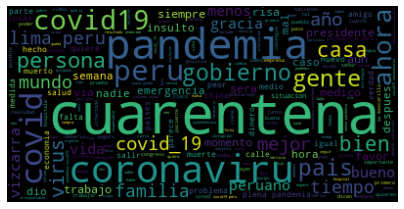

In [26]:
## Create and generate a word cloud image:
wc = WordCloud().generate(words)
# Display the generated image:
plt.figure(figsize=[7,7])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

wc.to_file("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/WC0a_Peru.png")
plt.show()

<Figure size 432x288 with 0 Axes>

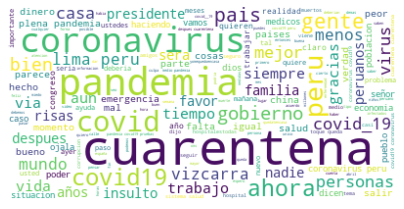

In [27]:
# lower max_font_size, change the maximum number of word and lighten the background:
wc = WordCloud(max_font_size=50, max_words=1000,normalize_plurals=False, background_color="white").generate(words)
wc.to_file("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/WC0b_Peru.png")
plt.figure()
plt.figure(figsize=[7,7])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

Masked wordcloud

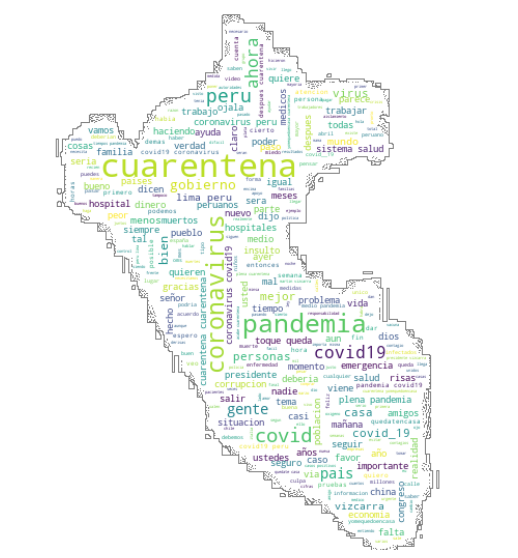

In [28]:
# Se carga imagen en color blanco y negro que se utilizará para 


mask = np.array(Image.open("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/Figure1.jpg"))
# Se crea la nube de palabras en imagen con 1000 palabras
wc = WordCloud(background_color="white", max_words=1000, normalize_plurals=False, mask=mask, contour_width=0.001, contour_color='gray')
# Se genera contenido nube de palabras
wc.generate(words)
# Se almacena
wc.to_file("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/WC1_Peru.png")
# Se muestra
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

Image-colored wordcloud with boundary map

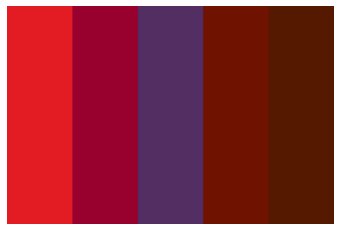

In [29]:
from PIL import Image
mask = Image.open("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/Figure2.png");
plt.axis("off")
plt.imshow(mask)

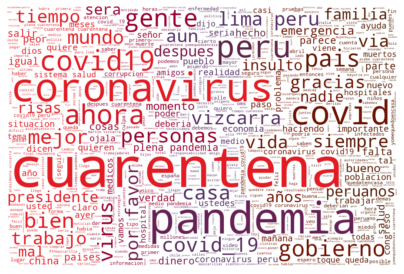

In [30]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["caso","menos"])
words = words.replace("favor", "por favor")

# Se carga imagen en color blanco y negro que se utilizará para 
#mask = np.array(Image.open("C:/Users/jilli/Desktop/cv/portafolio/1 nube de palabras/nubedepalabras/peruflag.png"))
mask = np.array(Image.open("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/Figure2.png"))
wc = WordCloud(stopwords=stopwords, background_color="white", max_words=1000,normalize_plurals=False, mask=mask).generate(words)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# Se almacena
wc.to_file("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/WC2_Peru.png")

plt.show()

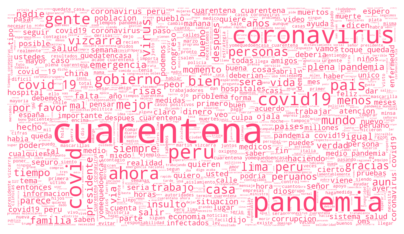

In [31]:
# Se carga imagen en color blanco y negro que se utilizará para 
#mask = np.array(Image.open("C:/Users/jilli/Desktop/cv/portafolio/1 nube de palabras/nubedepalabras/peruflag.png"))
mask = np.array(Image.open("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/Figure3.png"))
wc = WordCloud(background_color="white", max_words=1000, normalize_plurals=False, mask=mask).generate(words)
   
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

# Se almacena
wc.to_file("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/WC3a_Peru.png")

Using custom colors

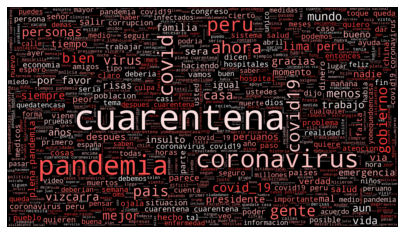

In [32]:

#color_func
#Callable with parameters word, font_size, position, orientation, font_path, random_state 
#that returns a PIL color for each word. To create a word cloud with a single color, 
# use color_func=lambda *args, **kwargs: "white". The single color can also be specified 
#using RGB code. 
#For example color_func=lambda *args, **kwargs: (255,0,0) sets color to red.

import random

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 100%%, %d%%)" % random.randint(60, 100)

#colors : https://www.w3schools.com/html/html_colors_hsl.asp
#(hue, saturation, luminance)
 #he luminosity is what is controlling the gray scale portion. 
 #That is, this particular random value is determining the gray scale: random.randint(60, 100)
# Practically, you need to change the bounds of this random int to a value 
 #between 0 and whatever value you feel is appropriately "dark" enough to work with your printer.

# hsl(282, 100%, 50%) Purple


from os import path
mask = np.array(Image.open(path.join("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/", "Figure3.png")))

wc = WordCloud(background_color="black", max_words=1000, normalize_plurals=False,mask=mask).generate(words)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()


# Se almacena
wc.to_file("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/WC3b_Peru.png")


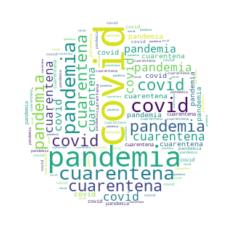

In [44]:
my_list=["covid", "pandemia", "cuarentena"]
words = " ".join(review for review in my_list)

import matplotlib.pyplot as plt

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask) #en forma circular
#wc = WordCloud(background_color="white",repeat=True).generate(words) # en forma rectangular
wc.generate(words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Se almacena
wc.to_file("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/WC4a_Peru.png")

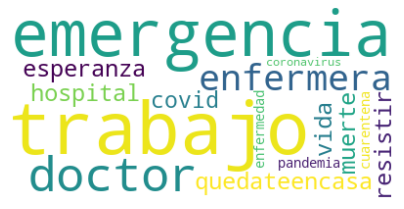

In [34]:
my_list=["trabajo","emergencia","doctor","enfermera","quedateencasa","muerte","esperanza","hospital","resistir","vida","covid", "pandemia", "cuarentena","enfermedad","coronavirus"]
my_words = " ".join(review for review in my_list)

## Create and generate a word cloud image:
wc = WordCloud(background_color="white").generate(my_words)
#wordcloud = WordCloud(background_color="white",max_font_size=20, min_font_size=11,height= 100,width=300).generate(my_words)# same size letter
# Display the generated image:
plt.figure(figsize=[7,7])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Se almacena
wc.to_file("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/WC4b_Peru.png")

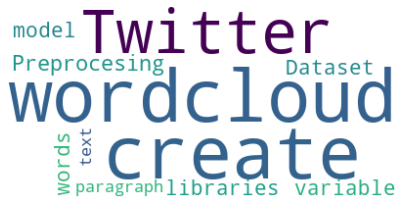

In [62]:
my_list=["wordcloud","create", "Twitter", "own","Preprocesing", "libraries","Dataset","variable","words","model","paragraph","text"]
my_words = " ".join(review for review in my_list)

## Create and generate a word cloud image:
wc = WordCloud(background_color="white").generate(my_words)
#wordcloud = WordCloud(background_color="white",max_font_size=20, min_font_size=11,height= 100,width=300).generate(my_words)# same size letter
# Display the generated image:
plt.figure(figsize=[7,7])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Se almacena
wc.to_file("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/WC4b_Peru.png")

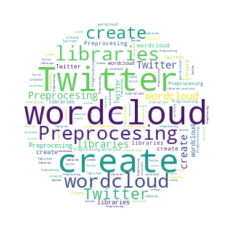

In [60]:
my_list=["wordcloud","create", "Twitter", "own","Preprocesing", "libraries",""]
words = " ".join(review for review in my_list)

import matplotlib.pyplot as plt

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask) #en forma circular
#wc = WordCloud(background_color="white",repeat=True).generate(words) # en forma rectangular
wc.generate(words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

# Se almacena
wc.to_file("C:/Users/jilli/Desktop/ANACONDA/WORDCLOUDS/wordcloud.png")

In [ ]:
?WordCloud

In [ ]:
https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
    https://book.pythontips.com/en/latest/args_and_kwargs.html
        https://pillow.readthedocs.io/en/stable/reference/Image.html
            https://github.com/amueller/word_cloud/issues/358
                https://amueller.github.io/word_cloud/auto_examples/colored_by_group.html
                    https://python-course.eu/applications-python/python-wordcloud-tutorial.php
                        https://www.datacamp.com/tutorial/wordcloud-python
                            https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/


a) Limpieza de datos
Una vez generada la tabla que contiene los textos con los cuales vamos a trabajar, debemos eliminar el ruido ajeno al texto que nos interesa: caracteres especiales, signos de puntuación y retornos de carro.

En primer lugar, ponemos en minúscula todos los caracteres para evitar cualquier error en los procesos que distinguen entre mayúsculas y minúsculas, mediante el uso del comando lower().  

Seguidamente eliminamos los signos de puntuación, como puntos, comas, exclamaciones, interrogaciones, entre muchos otros. Para la eliminación de estos recurriremos a la cadena preinicializada string.punctuacion de la librería string, que devuelve un conjunto de símbolos considerados signos de puntuación. Además, debemos eliminar las tabulaciones, saltos de carro y espacios extra, que no aportan información en este análisis, mediante el uso de expresiones regulares.  

Es fundamental aplicar todos estos pasos en una única función para que se procesen de forma secuencial, debido a que todos los procesos están altamente relacionados.

In [ ]:
WC['clean_text']=WC['clean_text'].str.findall('\w{2,}').str.join(' ')

In [ ]:

A WordCloud by definition is a computer visualization technique used in the text mining methods of document summarization (

 graphical representations of word frequency that give greater prominence to words that appear more frequently
 
A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.
It has a versatile utility to provide an overview by fractionating text down to those words with higher frequency. 

Google says a word cloud is “an image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance.”

In [ ]:
https://reproducible-science-curriculum.github.io/sharing-RR-Jupyter/01-sharing-github/

In [ ]:
df['clean_text']=df['clean_text'].str.findall('\w{2,}').str.join(' ') 
# .str.findal > buscar termino que está dentro de ()
# join(' ')  : unir terminos con " "
# {m,n}? busca la coincidencia de la expresi´on anterior de m a n veces, tomando tantas repeticiones como sea posible.
    # \w car´acter alfanum´erico o gui´on bajo
# por ejemplo si pongo ,2 ... borra "a" "y" etc junta todas las palabras que tienen dos ## o mas c
# por ejemplo si pongo ,4 ... borra "www ratooo
# por ejemplo si pongo ,6 ... me quedo con palabras de 6 letras o mas
# por ejemplo si pongo ,3 ... me quedo con palabras de 3 letras o mas
#busca los caracteres alfanumericos o guin bajo que se repitan 2 o mas veces tomando tantas repeticiones como sea posible
df[["Text","clean_text"]].head()

In [ ]:
filter
a= df[df.Text=="Positivo para coronavirus"]
a